In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# EDA 

In [3]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
id          7613 non-null int64
keyword     7552 non-null object
location    5080 non-null object
text        7613 non-null object
target      7613 non-null int64
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [5]:
train['text'].describe()

count                                                  7613
unique                                                 7503
top       11-Year-Old Boy Charged With Manslaughter of T...
freq                                                     10
Name: text, dtype: object

In [6]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
id          3263 non-null int64
keyword     3237 non-null object
location    2158 non-null object
text        3263 non-null object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [8]:
train['text_len'] = train['text'].apply(len)

In [9]:
train.head()

,id,keyword,location,text,target,text_len
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88


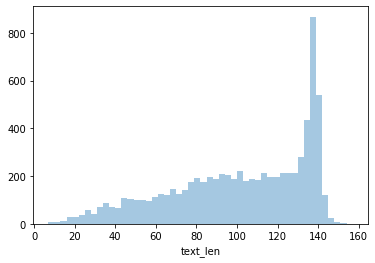

In [10]:
sns.distplot(train['text_len'],kde=False,bins=50)

In [11]:
train['text_len'].describe()

count    7613.000000
mean      101.037436
std        33.781325
min         7.000000
25%        78.000000
50%       107.000000
75%       133.000000
max       157.000000
Name: text_len, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000088B2A09148>,
      dtype=object)

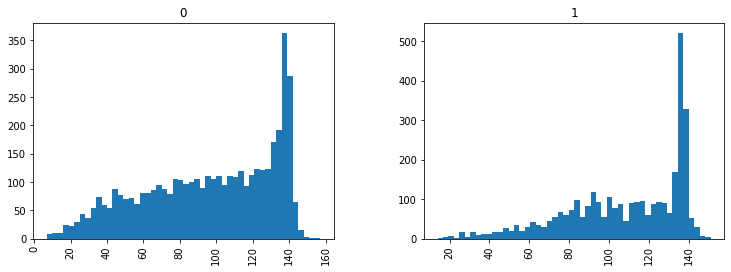

In [12]:
train.hist(column='text_len',by='target',bins=50,figsize=(12,4))

In [13]:
train['keyword'].value_counts()

fatalities               45
armageddon               42
deluge                   42
body%20bags              41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

# Modelling 

## MultinomialNB

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [15]:
import string
from nltk.corpus import stopwords

In [16]:
def text_process(news) :
    """
    1. remove punctuation
    2. remove stop words
    3. return list of clean text words
    """
    
    nopunc = [char for char in news if char not in string.punctuation]
    
    nopunc = "".join(nopunc)
    
    return [words for words in nopunc.split() if words.lower() not in stopwords.words('english')]

In [19]:
pipeline = Pipeline({
    ('bow',CountVectorizer(analyzer = text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
})

In [20]:
pipeline.fit(train['text'],train['target'])

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x00000088B496EEE8>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [21]:
pred = pipeline.predict(test['text'])

In [22]:
submission = pd.DataFrame(pred)

In [23]:
submission = pd.concat([test['id'],submission],axis=1)

In [24]:
submission.columns = ['id','target']

In [25]:
submission.to_csv('submission.csv',index=False)

## Passive Aggressive Classifier

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english',max_df=0.7)

In [ ]:
tfidf_train = tfidf_vectorizer.fit_transform(train['text'])
tfidf_test = tfidf_vectorizer.transform(test['text'])

In [ ]:
model = PassiveAggressiveClassifier(max_iter=50)

model.fit(tfidf_train,train['target'])

In [ ]:
pred = model.predict(tfidf_test)

In [ ]:
submission = pd.DataFrame(pred)

In [ ]:
submission = pd.concat([test['id'],submission],axis=1)
submission.columns = ['id','target']

In [ ]:
submission.to_csv('submission_v2.csv',index=False)